In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lowmeilin","key":"5a25100cb74a2fe472c681ee177f14c0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d danofer/sarcasm

Dataset URL: https://www.kaggle.com/datasets/danofer/sarcasm
License(s): copyright-authors
 96% 208M/216M [00:02<00:00, 125MB/s]
100% 216M/216M [00:02<00:00, 102MB/s]


In [5]:
!unzip sarcasm.zip

Archive:  sarcasm.zip
  inflating: test-balanced.csv       
  inflating: test-unbalanced.csv     
  inflating: train-balanced-sarc.csv.gz  
  inflating: train-balanced-sarcasm.csv  


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
df = pd.read_csv('train-balanced-sarcasm.csv')
news = df[df['subreddit'] == 'news']
news.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
68,0,Oh come on,toomanymidichlorians,news,2,2,0,2016-09,2016-09-20 11:21:51,is there still a difference nowadays?
205,0,blocked for being a moron,Horus_Krishna_2,news,1,-1,-1,2016-10,2016-10-13 13:57:26,Please use complete sentences. I don't know wh...
580,0,seriously...seems like it would be done pretty...,sleaze_bag_alert,news,2,-1,-1,2016-12,2016-12-14 17:44:18,Why hasn't someone assassinated this piece of ...
595,0,"oh, *growth* hormones.",-14k-,news,1,-1,-1,2016-10,2016-10-03 16:31:46,I had a friend who had a deficiency in growth ...
647,0,"I really really wish the ""dodged a bullet ther...",CliffRacer17,news,53,-1,-1,2016-11,2016-11-05 21:51:25,"Man drops ring, shoots girlfriend to death aft..."


In [8]:
news.tail()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
1010442,1,I can't believe President Obama would let him ...,packer64,news,-3,-3,0,2009-12,2009-12-12 15:44:02,"How Osama bin Laden Escaped... In December, 20..."
1010446,1,Then Id just plant something on you; cops woul...,figureoflight,news,1,1,0,2009-12,2009-12-23 19:43:03,yeah too bad I don't actually break any laws...
1010655,1,Wow...he smoked pot...oh lord hes such a horri...,rodneykm,news,1,1,0,2009-02,2009-02-02 13:18:48,"Michael Phelps Apologizes For ""Regrettable"" Be..."
1010727,1,Indian Givers!,Jynx1989,news,2,2,0,2009-10,2009-10-28 07:32:32,Lakota Indians want to withdraw their treaties...
1010808,1,Women shouldn't lead men anyway... it's in the...,musashiXXX,news,1,1,0,2009-09,2009-09-01 14:14:27,Read the comment section. The Glenn Beck fluff...


In [9]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16891 entries, 68 to 1010808
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           16891 non-null  int64 
 1   comment         16891 non-null  object
 2   author          16891 non-null  object
 3   subreddit       16891 non-null  object
 4   score           16891 non-null  int64 
 5   ups             16891 non-null  int64 
 6   downs           16891 non-null  int64 
 7   date            16891 non-null  object
 8   created_utc     16891 non-null  object
 9   parent_comment  16891 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.9+ MB


In [10]:
# check for any NaN values
news.isna().sum()

,0
label,0
comment,0
author,0
subreddit,0
score,0
ups,0
downs,0
date,0
created_utc,0
parent_comment,0


In [11]:
news.describe()

,label,score,ups,downs
count,16891.000000,16891.000000,16891.000000,16891.000000
mean,0.603457,8.458528,7.058611,-0.111420
std,0.489194,76.814597,67.586810,0.314661
min,0.000000,-73.000000,-73.000000,-1.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000
75%,1.000000,4.000000,3.000000,0.000000
max,1.000000,4057.000000,4057.000000,0.000000


In [12]:
news.shape

(16891, 10)

# EDA for Categorical Variables
## label, comment, author, subreddit, date, parent_comment


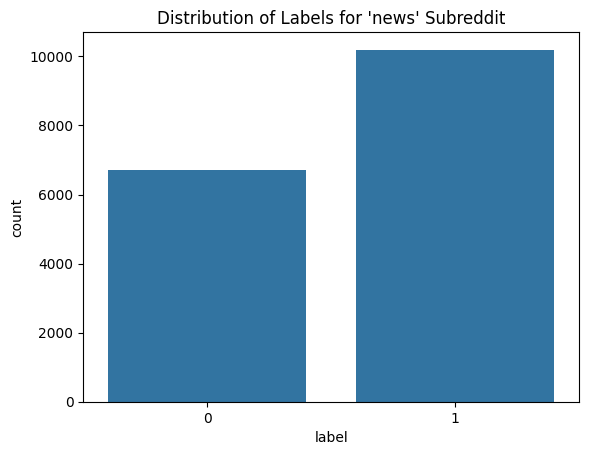

In [13]:
sns.countplot(x='label', data=news)
plt.title("Distribution of Labels for 'news' Subreddit")
plt.show()

In [14]:
def get_top_words(df, column_name, num_words):
  count_vectorizer = CountVectorizer(stop_words='english')
  word_count = count_vectorizer.fit_transform(df[column_name])

  word_sum = word_count.sum(axis=0)

  frequency = []
  for word, index in count_vectorizer.vocabulary_.items():
    frequency.append((word, word_sum[0, index]))

  frequency = sorted(frequency, key=lambda x: x[1], reverse=True)
  return frequency

In [15]:
# Top 10 frequently used words from comments
print(get_top_words(news, 'comment', 10))

[('people', 1440), ('just', 1360), ('like', 1039), ('yeah', 1000), ('don', 923), ('right', 636), ('sure', 589), ('yes', 511), ('know', 495), ('good', 482), ('think', 425), ('need', 406), ('make', 385), ('white', 383), ('police', 363), ('time', 353), ('gun', 328), ('thing', 327), ('way', 322), ('really', 313), ('didn', 313), ('money', 305), ('going', 297), ('want', 285), ('did', 284), ('man', 278), ('black', 277), ('let', 272), ('cops', 271), ('bad', 271), ('isn', 269), ('government', 269), ('better', 267), ('say', 262), ('oh', 261), ('doesn', 247), ('guns', 246), ('ll', 245), ('obviously', 243), ('clearly', 240), ('totally', 229), ('great', 219), ('work', 216), ('guy', 210), ('probably', 201), ('thought', 201), ('racist', 200), ('doing', 197), ('shit', 196), ('maybe', 194), ('ve', 193), ('stop', 186), ('world', 186), ('does', 185), ('mean', 184), ('years', 183), ('law', 182), ('country', 180), ('reddit', 179), ('fuck', 178), ('getting', 177), ('poor', 177), ('state', 177), ('things', 1

In [16]:
# Top 10 frequently used words from parent_comment
print(get_top_words(news, 'parent_comment', 10))

[('people', 2667), ('just', 1849), ('like', 1603), ('don', 1394), ('police', 1067), ('think', 843), ('know', 703), ('time', 693), ('right', 664), ('man', 641), ('year', 640), ('make', 630), ('going', 615), ('gun', 593), ('want', 580), ('way', 572), ('good', 566), ('really', 548), ('say', 533), ('years', 521), ('did', 517), ('need', 502), ('shit', 497), ('white', 483), ('old', 465), ('government', 463), ('black', 459), ('doesn', 446), ('thing', 437), ('school', 435), ('state', 429), ('ve', 426), ('isn', 419), ('fuck', 418), ('money', 418), ('fucking', 418), ('cops', 417), ('law', 414), ('actually', 409), ('person', 408), ('didn', 406), ('new', 405), ('guy', 404), ('said', 398), ('life', 396), ('does', 391), ('work', 381), ('sure', 364), ('world', 359), ('bad', 357), ('got', 355), ('shot', 354), ('things', 349), ('use', 342), ('officer', 340), ('stop', 334), ('country', 332), ('job', 330), ('let', 328), ('day', 327), ('cop', 324), ('getting', 323), ('pay', 316), ('kids', 305), ('lot', 30

In [17]:
def plot_bar_chart(df, column, top_n, title):
  top_categories = df[column].value_counts().head(top_n)
  top_categories.plot(kind='barh', title=title)
  print(top_categories)
  plt.show()

author
NeonDisease         138
mad-n-fla           102
tomjoads             84
sleaze_bag_alert     67
ivsciguy             57
Thelastofthree       42
SpiderDeUZ           37
Vahlir               34
kurisu7885           28
brainiac3397         25
Name: count, dtype: int64


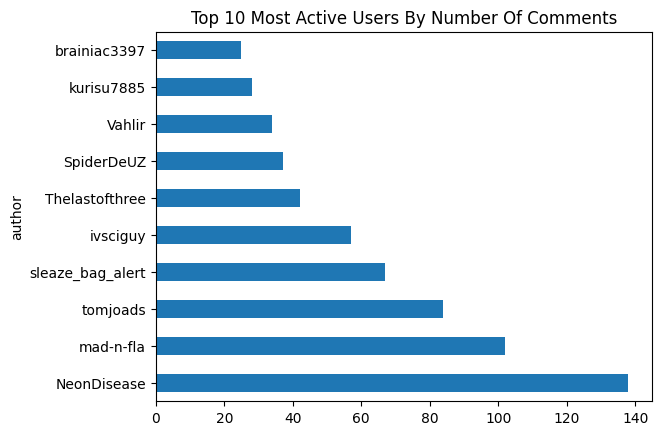

In [18]:
plot_bar_chart(news, 'author', 10, 'Top 10 Most Active Users By Number Of Comments')

<ipython-input-19-b4897e0ca25c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date_column'] = pd.to_datetime(news['date'], format='%Y-%m')


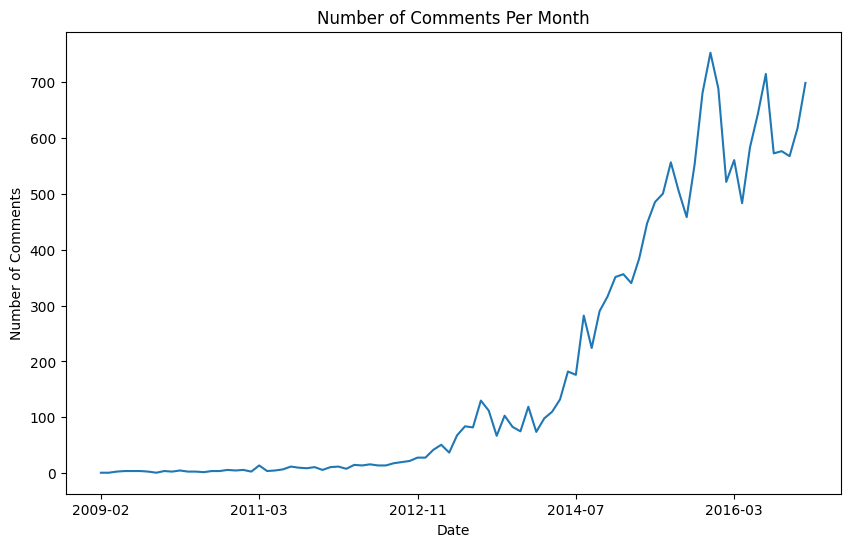

In [19]:
# convert to date time
news['date_column'] = pd.to_datetime(news['date'], format='%Y-%m')

# count the number of comments per month
monthly_counts = news.groupby('date').size()

# plot the time series
plt.figure(figsize=(10,6))
monthly_counts.plot(kind='line')
plt.title('Number of Comments Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

# EDA for Numerical Variables
## scores, ups, downs

In [20]:
def box_plot(df, column, title):
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])

  plt.title(title)
  plt.ylabel('Values')

In [21]:
def histogram(df, column, title, bins):
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=bins, edgecolor='black')

  plt.title(title)
  plt.xlabel('Values')
  plt.ylabel('Frequency')

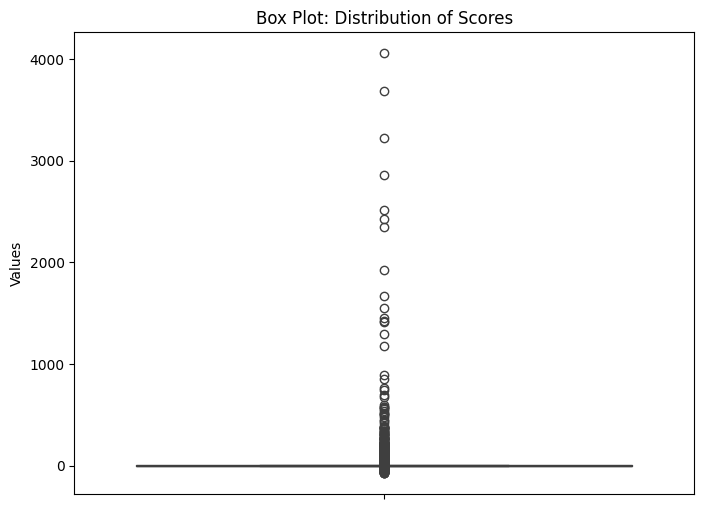

In [22]:
box_plot(news, 'score', 'Box Plot: Distribution of Scores')
# Shows negative scores

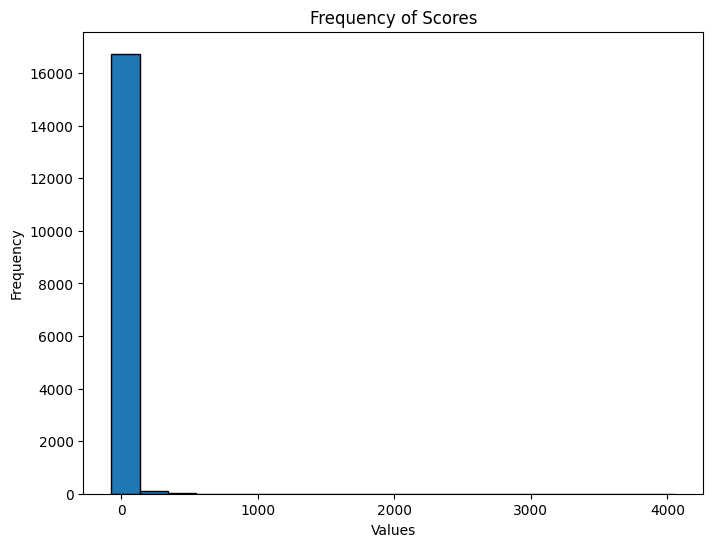

In [23]:
histogram(news, 'score', 'Frequency of Scores', 20)

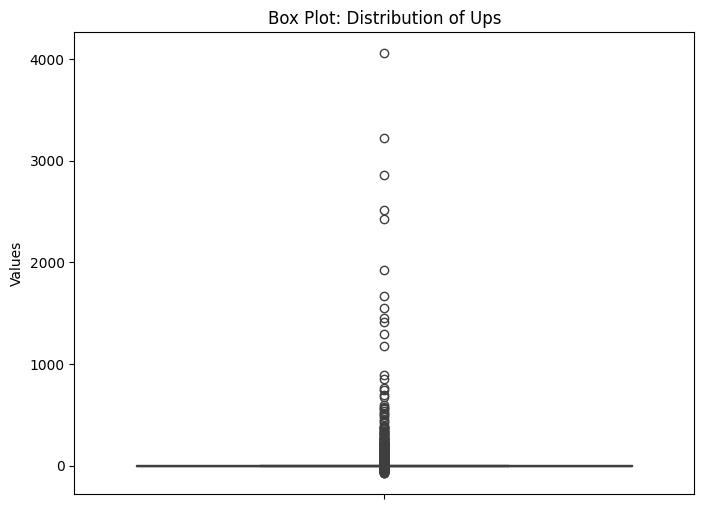

In [24]:
box_plot(news, 'ups', 'Box Plot: Distribution of Ups')

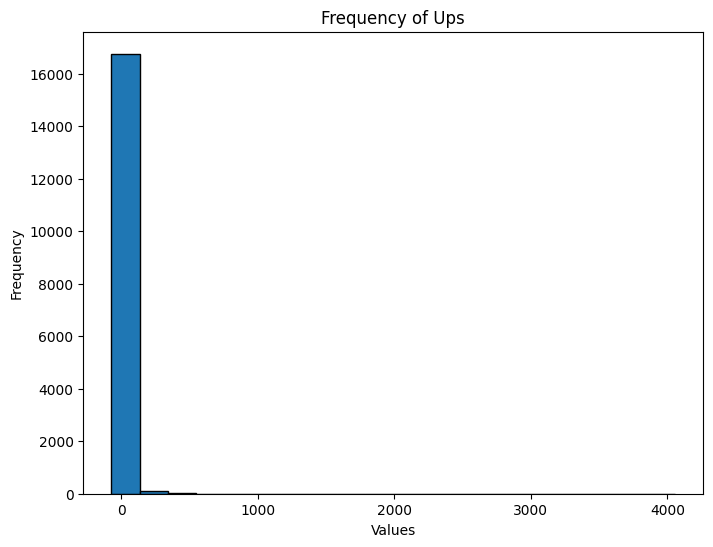

In [25]:
histogram(news, 'ups', 'Frequency of Ups', 20)

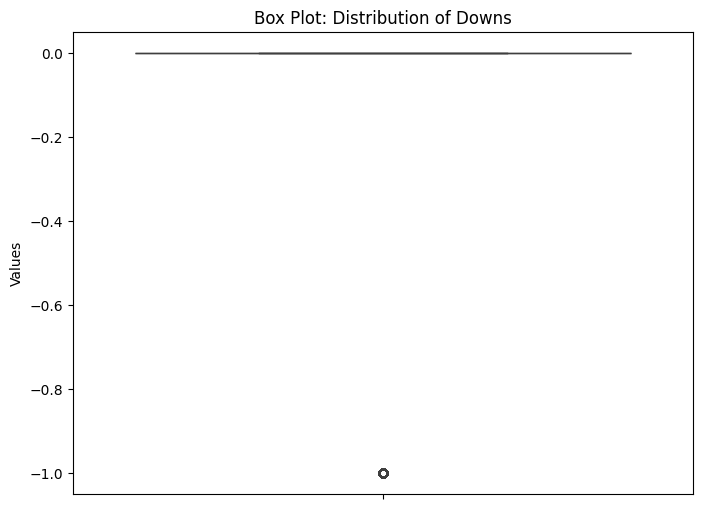

In [26]:
box_plot(news, 'downs', 'Box Plot: Distribution of Downs')

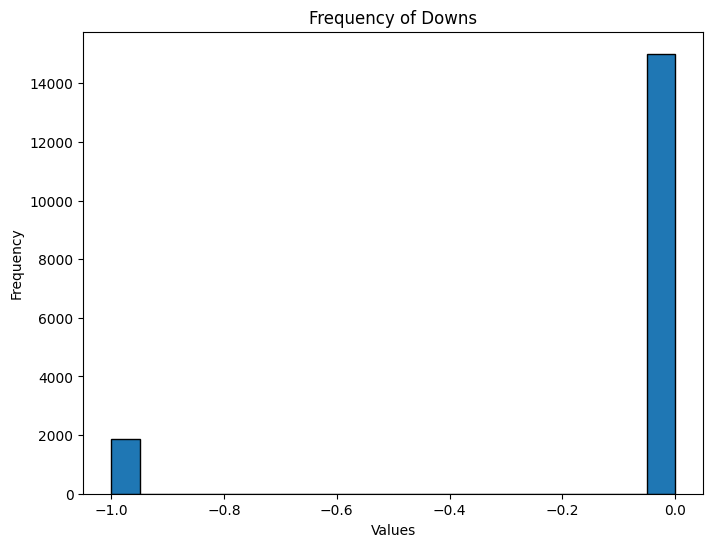

In [27]:
histogram(news, 'downs', 'Frequency of Downs', 20)

<function matplotlib.pyplot.show(close=None, block=None)>

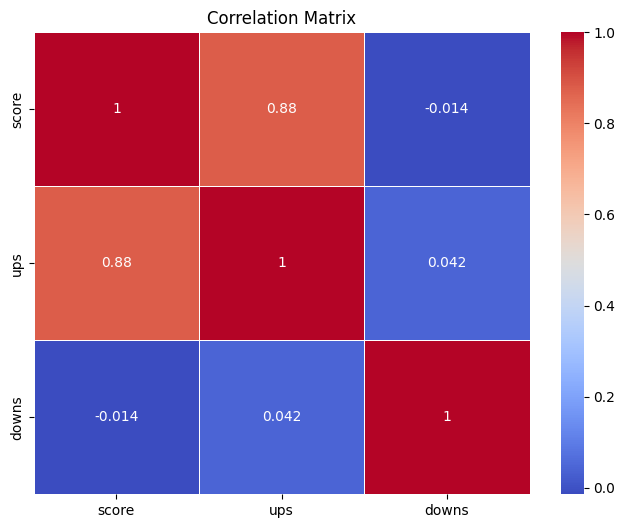

In [28]:
# Plot correlation matrix

df_numeric = news[['score', 'ups', 'downs']]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show